<a href="https://colab.research.google.com/github/Amimo-cell/datascience/blob/main/Oral_Cancer_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import io
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from google.colab import files

In [5]:
data=files.upload()

Saving oral_cancer_prediction_dataset.csv to oral_cancer_prediction_dataset (1).csv


In [7]:
#converting the file into a dataframe
data= pd.read_csv(io.StringIO(data['oral_cancer_prediction_dataset (1).csv'].decode('utf-8')))

In [8]:
data.head()

,ID,Country,Gender,Age,Tobacco_Use,Alcohol_Use,Socioeconomic_Status,Diagnosis_Stage,Treatment_Type,Survival_Rate,HPV_Related
0,1,Ethiopia,Male,34,1,1,High,Early,Radiotherapy,0.826235,0
1,2,Turkey,Female,84,1,1,High,Moderate,Radiotherapy,0.376607,0
2,3,Turkey,Female,62,1,1,Middle,Early,Radiotherapy,0.736296,1
3,4,Tanzania,Male,48,1,1,Middle,Moderate,Combination,0.786118,0
4,5,France,Male,26,1,1,Middle,Early,Radiotherapy,0.830411,0


In [32]:
data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Country,Ethiopia,Turkey,Turkey,Tanzania,France
Gender,Male,Female,Female,Male,Male
Age,34,84,62,48,26
Tobacco_Use,1,1,1,1,1
Alcohol_Use,1,1,1,1,1
Socioeconomic_Status,High,High,Middle,Middle,Middle
Diagnosis_Stage,Early,Moderate,Early,Moderate,Early
Treatment_Type,Radiotherapy,Radiotherapy,Radiotherapy,Combination,Radiotherapy
Survival_Rate,0.826235,0.376607,0.736296,0.786118,0.830411


In [9]:
data.tail()

,ID,Country,Gender,Age,Tobacco_Use,Alcohol_Use,Socioeconomic_Status,Diagnosis_Stage,Treatment_Type,Survival_Rate,HPV_Related
160287,160288,United Kingdom,Female,53,0,1,Middle,Late,Combination,0.718270,0
160288,160289,Brazil,Female,81,0,0,Low,Early,Chemotherapy,0.765502,0
160289,160290,Nigeria,Male,59,0,1,Low,Moderate,Radiotherapy,0.349600,1
160290,160291,Philippines,Female,43,0,0,High,Moderate,Chemotherapy,0.727410,1
160291,160292,Nigeria,Female,20,0,0,Low,Early,Surgery,0.741093,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    160292 non-null  int64  
 1   Country               160292 non-null  object 
 2   Gender                160292 non-null  object 
 3   Age                   160292 non-null  int64  
 4   Tobacco_Use           160292 non-null  int64  
 5   Alcohol_Use           160292 non-null  int64  
 6   Socioeconomic_Status  160292 non-null  object 
 7   Diagnosis_Stage       160292 non-null  object 
 8   Treatment_Type        160292 non-null  object 
 9   Survival_Rate         160292 non-null  float64
 10  HPV_Related           160292 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.5+ MB


In [11]:
data.isnull().sum()

,0
ID,0
Country,0
Gender,0
Age,0
Tobacco_Use,0
Alcohol_Use,0
Socioeconomic_Status,0
Diagnosis_Stage,0
Treatment_Type,0
Survival_Rate,0


<ipython-input-13-e95462d3a202>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=data, palette="magma")


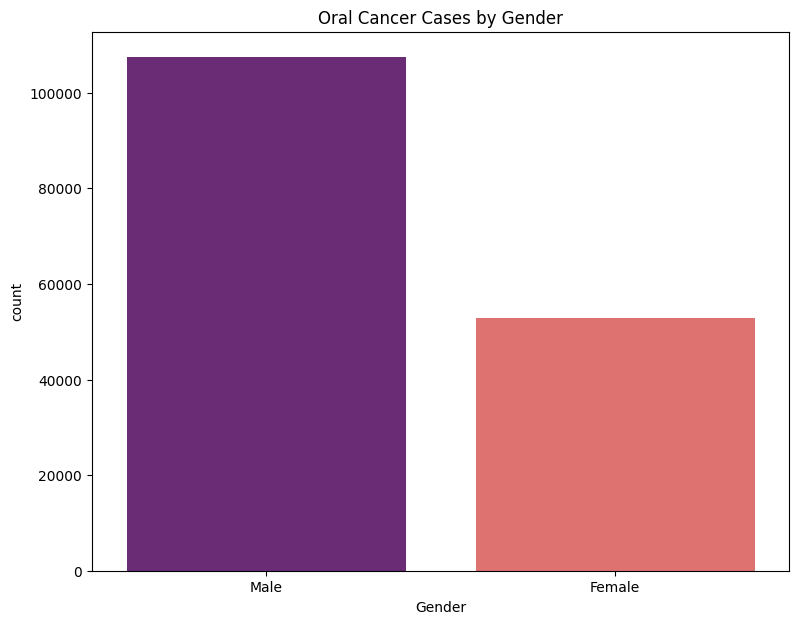

In [13]:
plt.figure(figsize=(9, 7))
sns.countplot(x="Gender", data=data, palette="magma")
plt.title("Oral Cancer Cases by Gender")
plt.show()

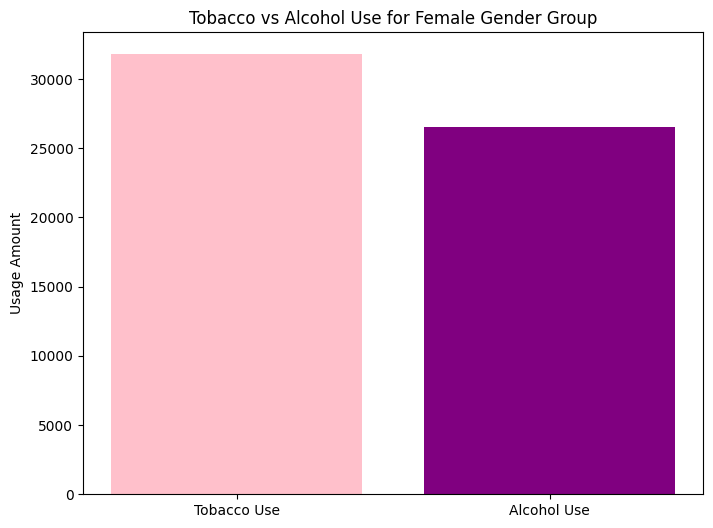

In [19]:
#Tobacco and Alcohol use among Female population
female_data= data[data['Gender'] == 'Female']
tobacco_use = female_data['Tobacco_Use'].sum()
alcohol_use = female_data['Alcohol_Use'].sum()
categories = ['Tobacco Use', 'Alcohol Use']
values = [tobacco_use, alcohol_use]
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['pink', 'purple'])
plt.title('Tobacco vs Alcohol Use for Female Gender Group')
plt.ylabel('Usage Amount')
plt.show()

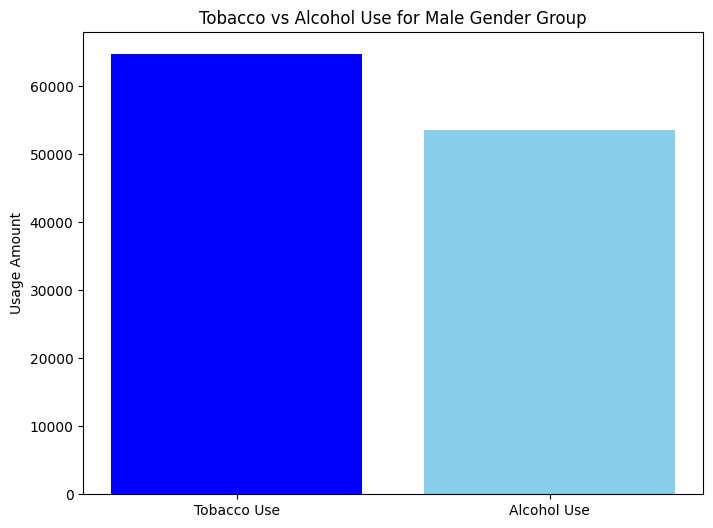

In [17]:
#Tobacco and Alcohol use among Male population
female_data= data[data['Gender'] == 'Male']
tobacco_use = female_data['Tobacco_Use'].sum()
alcohol_use = female_data['Alcohol_Use'].sum()
categories = ['Tobacco Use', 'Alcohol Use']
values = [tobacco_use, alcohol_use]
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'skyblue'])
plt.title('Tobacco vs Alcohol Use for Male Gender Group')
plt.ylabel('Usage Amount')
plt.show()

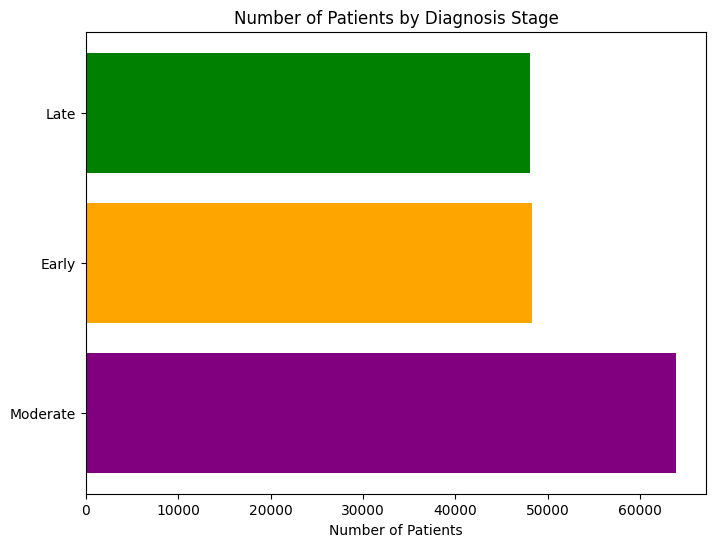

In [21]:
#Diagnosis Counts
diagnosis_counts = data['Diagnosis_Stage'].value_counts()
categories = diagnosis_counts.index
values = diagnosis_counts.values
plt.figure(figsize=(8, 6))
plt.barh(categories, values, color=['purple', 'orange', 'green'])
plt.xlabel('Number of Patients')
plt.title('Number of Patients by Diagnosis Stage')
plt.show()

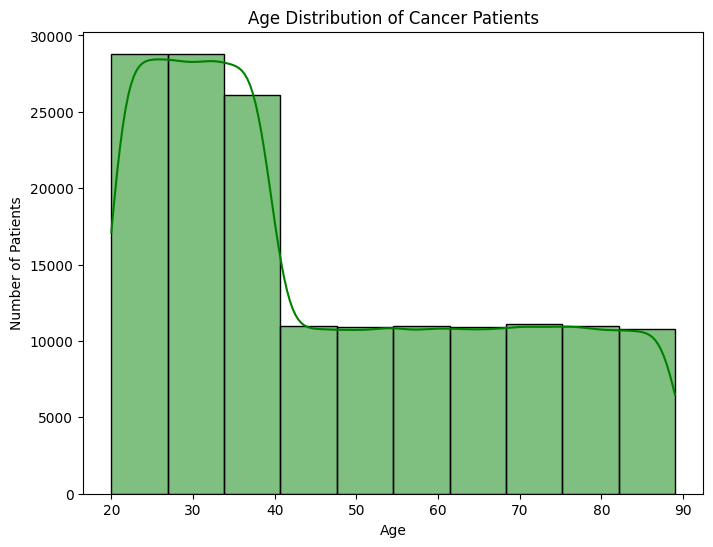

In [22]:
ages = data['Age']
plt.figure(figsize=(8, 6))
sns.histplot(ages, bins=10, kde=True, color='green', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Cancer Patients')
plt.show()

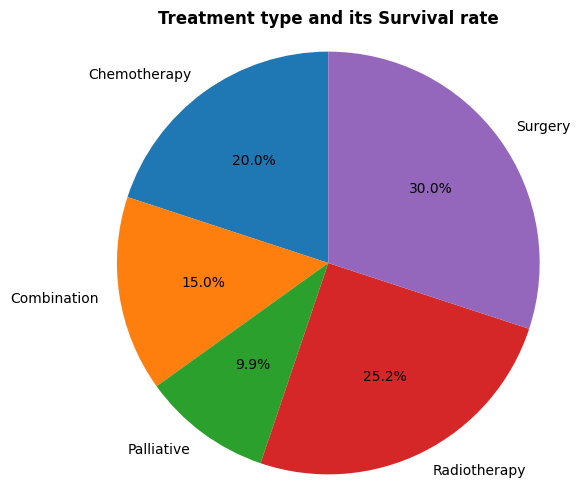

In [23]:
#groupby
grouped_data = data.groupby('Treatment_Type')['Survival_Rate'].sum()
labels = grouped_data.index
values = grouped_data.values
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Treatment type and its Survival rate', weight="bold")

# Display the chart
plt.show()


In [24]:
# Calculating the pearson coefficient
import scipy.stats as stats
pearson_coef, p_value=stats.pearsonr(data['Age'], data['Survival_Rate'])
print(pearson_coef)
print(p_value)

0.0006030684840279182
0.8092098111521621


In [30]:
# Select specific columns
selected_columns = ['Age', 'Survival_Rate']  # Modify this list to include only the desired columns
df_selected = data[selected_columns]
# Compute correlation matrix for selected columns
corr_matrix = df_selected.corr()


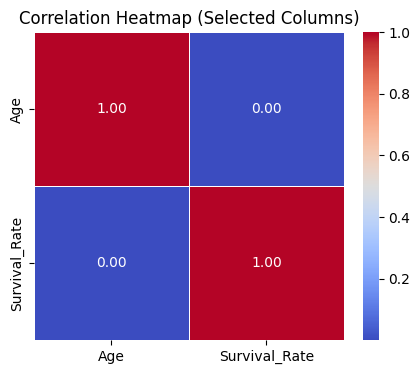

In [31]:
# Create heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Selected Columns)")
plt.show()

In [33]:
# Calculating the pearson coefficient
import scipy.stats as stats
pearson_coef, p_value=stats.pearsonr(data['Tobacco_Use'], data['Survival_Rate'])
print(pearson_coef)
print(p_value)

-0.0021209572306844864
0.39579726276810123


In [36]:
# grouping results
df_gptest = data[['Age','Socioeconomic_Status','Survival_Rate']]
grouped_test1 = df_gptest.groupby(['Age','Socioeconomic_Status'],as_index=False).mean()
grouped_test1

,Age,Socioeconomic_Status,Survival_Rate
0,20,High,0.612644
1,20,Low,0.595549
2,20,Middle,0.597239
3,21,High,0.611838
4,21,Low,0.600431
...,...,...,...
205,88,Low,0.593712
206,88,Middle,0.605794
207,89,High,0.588760
208,89,Low,0.593829


In [37]:
# grouping results
df_gptest = data[['Socioeconomic_Status','Survival_Rate']]
grouped_test1 = df_gptest.groupby(['Socioeconomic_Status'],as_index=False).mean()
grouped_test1

,Socioeconomic_Status,Survival_Rate
0,High,0.600941
1,Low,0.600094
2,Middle,0.599432


In [38]:
bins = np.linspace(min(data["Age"]), max(data["Age"]), 4)
bins

array([20., 43., 66., 89.])

In [39]:
#set the group names
group_names = ['Young', 'Middle-Aged', 'Old']

In [40]:
#using the cut function to show categories
data['Age-binned'] = pd.cut(data['Age'], bins, labels=group_names, include_lowest=True )
data[['Age','Age-binned']].head(10)

,Age,Age-binned
0,34,Young
1,84,Old
2,62,Middle-Aged
3,48,Middle-Aged
4,26,Young
5,26,Young
6,22,Young
7,76,Old
8,49,Middle-Aged
9,60,Middle-Aged


In [41]:
#number of vehicles in each bin
data["Age-binned"].value_counts()

,count
Age-binned,
Young,88382
Old,36016
Middle-Aged,35894


Text(0.5, 1.0, 'Age bins')

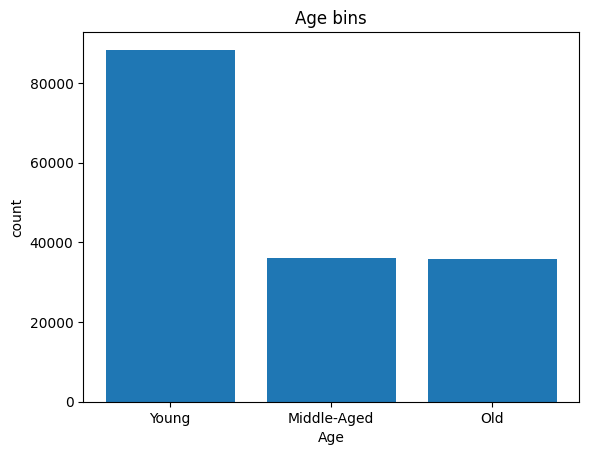

In [42]:
#plot a bar graph for the data
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, data["Age-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("count")
plt.pyplot.title("Age bins")

In [43]:
# grouping results
df_gptest = data[['Age-binned','Survival_Rate']]
grouped_test1 = df_gptest.groupby(['Age-binned'],as_index=False).mean()
grouped_test1

<ipython-input-43-5bfc07b6be41>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_test1 = df_gptest.groupby(['Age-binned'],as_index=False).mean()


,Age-binned,Survival_Rate
0,Young,0.599954
1,Middle-Aged,0.599325
2,Old,0.600742
